In [1]:
import pandas as pd
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator


blastn -task blastn -evalue 10 -query /home/juan/Desktop/juan/bio/mirna_mrcv/data/mirna.y.fasta -subject /home/juan/Desktop/juan/bio/mirna_mite/data/mature.fa -outfmt '6 qseqid sseqid qstart qend sstart send mismatch gaps pident evalue length qlen slen qcovs score' > /home/juan/Desktop/juan/bio/mirna_mrcv/data/mirna.y.mature.csv

In [2]:
libs = {}
libs['SRR1197125'] = 'SRR1197125_germinating_seed_embryo'
libs['SRR1197126'] = 'SRR1197126_seedling_leaf'
libs['SRR1197127'] = 'SRR1197127_seedling_root'
libs['SRR1197128'] = 'SRR1197128_grain_8_days_after_pollination'
path_transcripts = '/home/juan/Desktop/juan/bio/mirna_mite/data/fixed.cdna.all.fa'
path_genes_deg = '/home/juan/Desktop/juan/bio/mirna_mrcv/data/DEG-normalized.csv'
path_annotation = '/home/juan/Desktop/juan/bio/mirna_mrcv/data/iwgsc_refseqv1.0_FunctionalAnnotation_v1__HCgenes_v1.0.TAB'
path_mirnas_deg = '/home/juan/Desktop/juan/bio/mirna_mrcv/data/mirna.deg.csv'
path_mirnas = '/home/juan/Desktop/juan/bio/mirna_mrcv/data/results.valid.csv'
path_libs = '/home/juan/Desktop/juan/bio/mirna_mrcv/data/sun_deg/%s'
path_transcripts_res = '/home/juan/Desktop/juan/bio/mirna_mrcv/data/targets.fa'
path_res = '/home/juan/Desktop/juan/bio/mirna_mrcv/data/res.csv'
path_mirbase_res = '/home/juan/Desktop/juan/bio/mirna_mrcv/data/mirna.y.mature.csv'
path_psrna = 'data/psRNATargetJob-1567167005564003.txt'

In [3]:
df_psrna = pd.read_csv(path_psrna, sep='\t',comment='#')
len(df_psrna.index)

1947

In [4]:
df_psrna.head(2)

,miRNA_Acc.,Target_Acc.,Expectation,UPE$,miRNA_start,miRNA_end,Target_start,Target_end,miRNA_aligned_fragment,alignment,Target_aligned_fragment,Inhibition,Target_Desc.,Multiplicity
0,Cluster_19641,TraesCS6A02G014800.1,1.0,-1.0,1,21,1989,2009,AUAGCAUCAUCCAUUCUACCA,:::: ::::::::::::::::,UGGUCGAAUGGAUGAUGCUAU,Cleavage,cdna chromosome:IWGSC:6A:7173529:7176806:-1 ge...,1
1,Cluster_19641,TraesCS6B02G021600.1,1.0,-1.0,1,21,2260,2280,AUAGCAUCAUCCAUUCUACCA,:::: ::::::::::::::::,UGGUCGAAUGGAUGAUGCUAU,Cleavage,cdna chromosome:IWGSC:6B:13651539:13655015:-1 ...,1


In [5]:
dfs = []
for lib,description in libs.items():
    path_lib = path_libs % lib
    df = pd.read_csv(path_lib, sep='\t',comment='#')
    print(lib, len(df.index))
    df['lib'] = description
    dfs.append(df)

SRR1197125 376
SRR1197126 419
SRR1197127 555
SRR1197128 224


In [6]:
df_cleave = pd.concat(dfs)
print(len(df_cleave.index))

1574


In [7]:
#f_cleave = df_cleave[df_cleave.DegradomePval < 0.05]
#rint(len(df_cleave.index))

In [8]:
df_cleave = df_cleave[df_cleave.DegradomeCategory <= 3]
print(len(df_cleave.index))

736


In [9]:
df_cleave.drop_duplicates(['SiteID','Query','lib'], inplace=True)
print(len(df_cleave.index))

736


In [10]:
df_cleave = df_cleave.reset_index(drop=True)

In [11]:
print(len(df_cleave[df_cleave.DegradomeCategory == 0].index))


95


In [12]:
df_cleave.head(2)

,SiteID,Query,Transcript,TStart,TStop,TSlice,MFEperfect,MFEsite,MFEratio,AllenScore,Paired,Unpaired,Structure,Sequence,DegradomeCategory,DegradomePval,Tplot_file_path,lib
0,TraesCS1A02G142500.1:1345,Cluster_30793 6D:95858420-95858697 l2fc:0.581922,TraesCS1A02G142500.1,1333,1354,1345,-43.0,-28.3,0.65814,8.0,"2-11,1353-1344;13-20,1341-1334","1-1,1354-1354[UP5];12-12,1343-1342[AILt];21-21...",.((((((((..((((((((((.&.))))))))))-.)))))))).,ACUUGAACAGACACGGAGCUGA&GCGGCUCUGUG-GUGUUCAAGC,2,1.0,/home/juan/Desktop/juan/bio/mirna_mrcv/data/su...,SRR1197125_germinating_seed_embryo
1,TraesCS1A02G142500.2:1288,Cluster_30793 6D:95858420-95858697 l2fc:0.581922,TraesCS1A02G142500.2,1276,1297,1288,-43.0,-28.3,0.65814,8.0,"2-11,1296-1287;13-20,1284-1277","1-1,1297-1297[UP5];12-12,1286-1285[AILt];21-21...",.((((((((..((((((((((.&.))))))))))-.)))))))).,ACUUGAACAGACACGGAGCUGA&GCGGCUCUGUG-GUGUUCAAGC,2,1.0,/home/juan/Desktop/juan/bio/mirna_mrcv/data/su...,SRR1197125_germinating_seed_embryo


In [13]:
print(len(df_cleave.index))

736


In [14]:
df_cleave.Query.nunique()

11

In [15]:
df_cleave.Transcript.nunique()

579

In [16]:
df_cleave.SiteID.nunique()

620

In [17]:
df_cleave['lib'] = df_cleave.groupby(['SiteID'])['lib'].transform(lambda x: ','.join(x))
df_cleave = df_cleave.drop_duplicates(subset=['SiteID'], keep='first')


In [18]:
df_cleave.SiteID.nunique()

620

In [19]:
df_cleave['Query'] = df_cleave['Query'].str.split(' ').str[0]

In [20]:
df_cleave = df_cleave[['Query','Transcript','DegradomeCategory','DegradomePval','TStart','TStop','TSlice','lib']]


In [23]:
df_res_1 = pd.merge(df_psrna, df_cleave, how='outer', left_on=['miRNA_Acc.','Target_Acc.','Target_start'], right_on=['Query','Transcript','TStart'])
print(len(df_res_1.index))
df_res_1.head(2)

2516


,miRNA_Acc.,Target_Acc.,Expectation,UPE$,miRNA_start,miRNA_end,Target_start,Target_end,miRNA_aligned_fragment,alignment,...,Target_Desc.,Multiplicity,Query,Transcript,DegradomeCategory,DegradomePval,TStart,TStop,TSlice,lib
0,Cluster_19641,TraesCS6A02G014800.1,1.0,-1.0,1.0,21.0,1989.0,2009.0,AUAGCAUCAUCCAUUCUACCA,:::: ::::::::::::::::,...,cdna chromosome:IWGSC:6A:7173529:7176806:-1 ge...,1.0,Cluster_19641,TraesCS6A02G014800.1,2.0,0.005693,1989.0,2009.0,2000.0,"SRR1197125_germinating_seed_embryo,SRR1197127_..."
1,Cluster_19641,TraesCS6B02G021600.1,1.0,-1.0,1.0,21.0,2260.0,2280.0,AUAGCAUCAUCCAUUCUACCA,:::: ::::::::::::::::,...,cdna chromosome:IWGSC:6B:13651539:13655015:-1 ...,1.0,Cluster_19641,TraesCS6B02G021600.1,1.0,0.000131,2260.0,2280.0,2271.0,"SRR1197125_germinating_seed_embryo,SRR1197127_..."


In [24]:
df_res_2 = pd.merge(df_psrna, df_cleave,how='outer', left_on=['miRNA_Acc.','Target_Acc.','Target_end'], right_on=['Query','Transcript','TStop'])
print(len(df_res_2.index))
df_res_2.head(2)


2505


,miRNA_Acc.,Target_Acc.,Expectation,UPE$,miRNA_start,miRNA_end,Target_start,Target_end,miRNA_aligned_fragment,alignment,...,Target_Desc.,Multiplicity,Query,Transcript,DegradomeCategory,DegradomePval,TStart,TStop,TSlice,lib
0,Cluster_19641,TraesCS6A02G014800.1,1.0,-1.0,1.0,21.0,1989.0,2009.0,AUAGCAUCAUCCAUUCUACCA,:::: ::::::::::::::::,...,cdna chromosome:IWGSC:6A:7173529:7176806:-1 ge...,1.0,Cluster_19641,TraesCS6A02G014800.1,2.0,0.005693,1989.0,2009.0,2000.0,"SRR1197125_germinating_seed_embryo,SRR1197127_..."
1,Cluster_19641,TraesCS6B02G021600.1,1.0,-1.0,1.0,21.0,2260.0,2280.0,AUAGCAUCAUCCAUUCUACCA,:::: ::::::::::::::::,...,cdna chromosome:IWGSC:6B:13651539:13655015:-1 ...,1.0,Cluster_19641,TraesCS6B02G021600.1,1.0,0.000131,2260.0,2280.0,2271.0,"SRR1197125_germinating_seed_embryo,SRR1197127_..."


In [25]:
df_res = pd.concat([df_res_1, df_res_2])
print(len(df_res.index))
df_res = df_res.drop_duplicates()
print(len(df_res.index))


5021
2548


In [26]:
df_res.head(4)


,miRNA_Acc.,Target_Acc.,Expectation,UPE$,miRNA_start,miRNA_end,Target_start,Target_end,miRNA_aligned_fragment,alignment,...,Target_Desc.,Multiplicity,Query,Transcript,DegradomeCategory,DegradomePval,TStart,TStop,TSlice,lib
0,Cluster_19641,TraesCS6A02G014800.1,1.0,-1.0,1.0,21.0,1989.0,2009.0,AUAGCAUCAUCCAUUCUACCA,:::: ::::::::::::::::,...,cdna chromosome:IWGSC:6A:7173529:7176806:-1 ge...,1.0,Cluster_19641,TraesCS6A02G014800.1,2.0,0.005693,1989.0,2009.0,2000.0,"SRR1197125_germinating_seed_embryo,SRR1197127_..."
1,Cluster_19641,TraesCS6B02G021600.1,1.0,-1.0,1.0,21.0,2260.0,2280.0,AUAGCAUCAUCCAUUCUACCA,:::: ::::::::::::::::,...,cdna chromosome:IWGSC:6B:13651539:13655015:-1 ...,1.0,Cluster_19641,TraesCS6B02G021600.1,1.0,0.000131,2260.0,2280.0,2271.0,"SRR1197125_germinating_seed_embryo,SRR1197127_..."
2,Cluster_19641,TraesCS6A02G099387.1,1.0,-1.0,1.0,21.0,657.0,677.0,AUAGCAUCAUCCAUUCUACCA,:: :::::::::::::::::,...,cdna chromosome:IWGSC:6A:67003134:67003973:-1 ...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Cluster_10582,TraesCS5B02G364700.1,1.5,-1.0,1.0,21.0,1233.0,1253.0,UGGACGAGGAUGUGCAGCUGC,::::::::.:::::::::::,...,cdna chromosome:IWGSC:5B:543279875:543283702:-...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
df_mirs_degs = pd.read_csv(path_mirnas_deg, sep=',')

In [28]:
df_mirs_degs.head(2)

,Name,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,X21dpiR1C.trimmed,X21dpiR3C.trimmed,X21dpiR1T.trimmed,X21dpiR3T.trimmed
0,Cluster_5906,1533.554970,-0.915816,0.266553,-3.435770,0.000591,0.011345,2117.820919,1890.567394,889.547312,1236.284254
1,Cluster_6309,299.190319,-1.201318,0.434553,-2.764489,0.005701,0.049756,560.897973,273.056245,188.741588,174.065467


In [31]:
df_mirs_degs = df_mirs_degs[['Name','log2FoldChange']]

In [32]:
df_mirs_degs.head(2)

,Name,log2FoldChange
0,Cluster_5906,-0.915816
1,Cluster_6309,-1.201318


In [33]:
df_mirs = pd.read_csv(path_mirnas, sep='\t')
df_mirs.head(2)

,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,DicerCall,MIRNA,PhaseScore,Short,Long,20,21,22,23,24
0,1A:309399489-309399664,Cluster_872,176,553,4.340,1,0.002,-,ACGGCAUAGAGGCACUGCAAA,327,...,21,Y,-1.0,7,1,35,440,61,5,4
1,1A:419025472-419025570,Cluster_1015,99,384,3.014,20,1.000,+,CGAAUGUAUUUUUUAUGGCUUG,249,...,22,Y,-1.0,2,3,27,83,264,3,2


In [34]:
df_annotation = pd.read_csv(path_annotation, sep='\t')
print(len(df_annotation.index))
df_annotation.head(2)

137052


,Gene-ID,is_repr,AHRD-Quality-Code,Blast-Hit-Accession,Human-Readable-Description,Pfam-IDs-(Description),Interpro-IDs-(Description),GO-IDs-(Description)-via-Interpro,Gene-or-TE-TE?-U (via-function),Pfam-IDs,Interpro-IDs,GO-IDs-via-Interpro
0,TraesCS1A01G000100.1,1,-**,sp|P0AGJ7|TRML_ECOLI,tRNA (cytidine(34)-2'-O)-methyltransferase,NaN,NaN,NaN,G,NaN,NaN,NaN
1,TraesCS1A01G000200.1,1,--*,sp|Q9NS15|LTBP3_HUMAN,Latent-transforming growth factor beta-binding...,NaN,NaN,NaN,G,NaN,NaN,NaN


In [35]:
df_annotation = df_annotation[['Gene-ID','Human-Readable-Description']]

In [36]:
df_annotation['Gene-ID'] = df_annotation['Gene-ID'].replace("01G", "02G",regex = True) 

In [37]:
df_annotation.head(2)

,Gene-ID,Human-Readable-Description
0,TraesCS1A02G000100.1,tRNA (cytidine(34)-2'-O)-methyltransferase
1,TraesCS1A02G000200.1,Latent-transforming growth factor beta-binding...


In [38]:
df_genes_deg = pd.read_csv(path_genes_deg, sep=',')
print(len(df_genes_deg.index))
df_genes_deg.head(2)

3019


,Unnamed: 0,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,C1.counts.txt,C2.counts.txt,C3.counts.txt,C4.counts.txt,T1.counts.txt,T2.counts.txt,T3.counts.txt,T4.counts.txt
0,1,gene:TraesCS2B02G286300,320.013057,-2.445058,0.225052,-10.864391,1.703566e-27,5.369742e-23,582.257421,553.695714,476.353565,549.686360,77.245985,81.333777,93.617622,145.914014
1,2,gene:TraesCS2B02G336800,2294.525203,2.909847,0.268059,10.855257,1.882766e-27,5.369742e-23,532.840739,512.938938,500.171243,609.940442,4976.988116,5270.112921,2148.061490,3805.147731


In [39]:
df_genes_deg = df_genes_deg[['gene','log2FoldChange']]
df_genes_deg['gene'] = df_genes_deg['gene'].str.split('gene:').str[1]
df_genes_deg.rename(columns={'log2FoldChange':'gene_deg_log2FoldChange'}, inplace=True)
df_genes_deg.head(2)

,gene,gene_deg_log2FoldChange
0,TraesCS2B02G286300,-2.445058
1,TraesCS2B02G336800,2.909847


In [40]:
#merge df_cleave df_mirs df_mirs_degs df_annotation

In [41]:
df_mirs_degs.head(2)

,Name,log2FoldChange
0,Cluster_5906,-0.915816
1,Cluster_6309,-1.201318


In [51]:
df_1 = pd.merge(df_mirs, df_mirs_degs, left_on='Name', right_on='Name')
print(len(df_1.index))
#df_1.drop(['Name'], axis=1, inplace=True)
df_1.head(3)

11


,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,MIRNA,PhaseScore,Short,Long,20,21,22,23,24,log2FoldChange
0,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.000,+,UAGGCGGUCACCUUGGCUAG,2883,...,Y,-1.0,1080,3,4050,798,52,0,2,-0.915816
1,2A:652328872-652329011,Cluster_6309,140,1185,9.300,1,0.001,-,UGCCAAAGGAGAGUUGCCCUG,1136,...,Y,-1.0,14,0,3,1155,11,2,0,-1.201318
2,2A:707747480-707747579,Cluster_6516,100,1271,9.975,1,0.999,+,UGGACGAGGAUGUGCAGCUGC,988,...,Y,-1.0,9,2,2,1256,2,0,0,0.908011


In [52]:
df_res.head(2)

,miRNA_Acc.,Target_Acc.,Expectation,UPE$,miRNA_start,miRNA_end,Target_start,Target_end,miRNA_aligned_fragment,alignment,...,Multiplicity,Query,Transcript,DegradomeCategory,DegradomePval,TStart,TStop,TSlice,lib,gene
0,Cluster_19641,TraesCS6A02G014800.1,1.0,-1.0,1.0,21.0,1989.0,2009.0,AUAGCAUCAUCCAUUCUACCA,:::: ::::::::::::::::,...,1.0,Cluster_19641,TraesCS6A02G014800.1,2.0,0.005693,1989.0,2009.0,2000.0,"SRR1197125_germinating_seed_embryo,SRR1197127_...",TraesCS6A02G014800
1,Cluster_19641,TraesCS6B02G021600.1,1.0,-1.0,1.0,21.0,2260.0,2280.0,AUAGCAUCAUCCAUUCUACCA,:::: ::::::::::::::::,...,1.0,Cluster_19641,TraesCS6B02G021600.1,1.0,0.000131,2260.0,2280.0,2271.0,"SRR1197125_germinating_seed_embryo,SRR1197127_...",TraesCS6B02G021600


In [53]:
df_res['gene'] = df_res['Transcript'].str.split('.').str[0]

In [54]:
df_res.head(2)

,miRNA_Acc.,Target_Acc.,Expectation,UPE$,miRNA_start,miRNA_end,Target_start,Target_end,miRNA_aligned_fragment,alignment,...,Multiplicity,Query,Transcript,DegradomeCategory,DegradomePval,TStart,TStop,TSlice,lib,gene
0,Cluster_19641,TraesCS6A02G014800.1,1.0,-1.0,1.0,21.0,1989.0,2009.0,AUAGCAUCAUCCAUUCUACCA,:::: ::::::::::::::::,...,1.0,Cluster_19641,TraesCS6A02G014800.1,2.0,0.005693,1989.0,2009.0,2000.0,"SRR1197125_germinating_seed_embryo,SRR1197127_...",TraesCS6A02G014800
1,Cluster_19641,TraesCS6B02G021600.1,1.0,-1.0,1.0,21.0,2260.0,2280.0,AUAGCAUCAUCCAUUCUACCA,:::: ::::::::::::::::,...,1.0,Cluster_19641,TraesCS6B02G021600.1,1.0,0.000131,2260.0,2280.0,2271.0,"SRR1197125_germinating_seed_embryo,SRR1197127_...",TraesCS6B02G021600


In [55]:
df_2 = pd.merge(df_1, df_res, left_on='Name', right_on='Query')
print(len(df_2.index))
df_2.drop(['Query'], axis=1, inplace=True)
df_2.head(10)

645


,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,Target_Desc.,Multiplicity,Transcript,DegradomeCategory,DegradomePval,TStart,TStop,TSlice,lib,gene
0,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,cdna chromosome:IWGSC:1D:37560421:37570424:1 g...,1.0,TraesCS1D02G057300.1,1.0,0.226548,961.0,980.0,971.0,SRR1197127_seedling_root,TraesCS1D02G057300
1,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,cdna chromosome:IWGSC:1A:138225347:138228929:-...,1.0,TraesCS1A02G122500.1,2.0,0.102661,1675.0,1694.0,1685.0,SRR1197127_seedling_root,TraesCS1A02G122500
2,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,cdna chromosome:IWGSC:5B:114425373:114427347:1...,1.0,TraesCS5B02G088900.1,3.0,0.143448,313.0,336.0,323.0,SRR1197125_germinating_seed_embryo,TraesCS5B02G088900
3,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,cdna chromosome:IWGSC:5A:108279551:108281446:-...,1.0,TraesCS5A02G082800.1,3.0,0.141654,235.0,258.0,245.0,SRR1197125_germinating_seed_embryo,TraesCS5A02G082800
4,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,cdna chromosome:IWGSC:5D:104625542:104627365:1...,1.0,TraesCS5D02G095400.1,3.0,0.148808,235.0,258.0,245.0,SRR1197125_germinating_seed_embryo,TraesCS5D02G095400
5,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,cdna chromosome:IWGSC:1B:420994227:420995410:1...,1.0,TraesCS1B02G234900.1,1.0,0.004992,418.0,437.0,428.0,SRR1197127_seedling_root,TraesCS1B02G234900
6,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,NaN,NaN,TraesCS1A02G308100.1,3.0,0.999774,2015.0,2034.0,2025.0,"SRR1197125_germinating_seed_embryo,SRR1197128_...",TraesCS1A02G308100
7,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,NaN,NaN,TraesCS1B02G005600.1,3.0,1.000000,1168.0,1190.0,1181.0,SRR1197125_germinating_seed_embryo,TraesCS1B02G005600
8,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,NaN,NaN,TraesCS1B02G018900.1,2.0,1.000000,658.0,677.0,668.0,SRR1197125_germinating_seed_embryo,TraesCS1B02G018900
9,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,NaN,NaN,TraesCS1B02G364500.3,3.0,0.999990,1025.0,1048.0,1036.0,SRR1197125_germinating_seed_embryo,TraesCS1B02G364500


In [56]:
df_3 = pd.merge(df_2, df_annotation, how='left', left_on='Transcript', right_on='Gene-ID')
print(len(df_3.index))
df_3.drop(['Gene-ID'], axis=1, inplace=True)
df_3.head(10)

645


,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,Multiplicity,Transcript,DegradomeCategory,DegradomePval,TStart,TStop,TSlice,lib,gene,Human-Readable-Description
0,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,1.0,TraesCS1D02G057300.1,1.0,0.226548,961.0,980.0,971.0,SRR1197127_seedling_root,TraesCS1D02G057300,Pyrimidine-specific ribonucleoside hydrolase
1,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,1.0,TraesCS1A02G122500.1,2.0,0.102661,1675.0,1694.0,1685.0,SRR1197127_seedling_root,TraesCS1A02G122500,Malic enzyme
2,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,1.0,TraesCS5B02G088900.1,3.0,0.143448,313.0,336.0,323.0,SRR1197125_germinating_seed_embryo,TraesCS5B02G088900,50S ribosomal protein L2
3,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,1.0,TraesCS5A02G082800.1,3.0,0.141654,235.0,258.0,245.0,SRR1197125_germinating_seed_embryo,TraesCS5A02G082800,50S ribosomal protein L2
4,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,1.0,TraesCS5D02G095400.1,3.0,0.148808,235.0,258.0,245.0,SRR1197125_germinating_seed_embryo,TraesCS5D02G095400,50S ribosomal protein L2
5,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,1.0,TraesCS1B02G234900.1,1.0,0.004992,418.0,437.0,428.0,SRR1197127_seedling_root,TraesCS1B02G234900,Alpha/beta hydrolase related protein
6,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,NaN,TraesCS1A02G308100.1,3.0,0.999774,2015.0,2034.0,2025.0,"SRR1197125_germinating_seed_embryo,SRR1197128_...",TraesCS1A02G308100,MYB transcription factor
7,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,NaN,TraesCS1B02G005600.1,3.0,1.000000,1168.0,1190.0,1181.0,SRR1197125_germinating_seed_embryo,TraesCS1B02G005600,SNF1-related protein kinase regulatory subunit...
8,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,NaN,TraesCS1B02G018900.1,2.0,1.000000,658.0,677.0,668.0,SRR1197125_germinating_seed_embryo,TraesCS1B02G018900,"Ras-related protein, expressed"
9,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,NaN,TraesCS1B02G364500.3,3.0,0.999990,1025.0,1048.0,1036.0,SRR1197125_germinating_seed_embryo,TraesCS1B02G364500,Tubulin alpha chain


In [57]:
df_4 = pd.merge(df_3, df_genes_deg,how='left', left_on='gene', right_on='gene')
print(len(df_4.index))
df_4.head(2)

645


,#Locus,Name,Length,Reads,RPM,UniqueReads,FracTop,Strand,MajorRNA,MajorRNAReads,...,Transcript,DegradomeCategory,DegradomePval,TStart,TStop,TSlice,lib,gene,Human-Readable-Description,gene_deg_log2FoldChange
0,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,TraesCS1D02G057300.1,1.0,0.226548,961.0,980.0,971.0,SRR1197127_seedling_root,TraesCS1D02G057300,Pyrimidine-specific ribonucleoside hydrolase,NaN
1,2A:485771022-485771154,Cluster_5906,133,5985,46.972,305,1.0,+,UAGGCGGUCACCUUGGCUAG,2883,...,TraesCS1A02G122500.1,2.0,0.102661,1675.0,1694.0,1685.0,SRR1197127_seedling_root,TraesCS1A02G122500,Malic enzyme,NaN


In [58]:
df_mirbase = pd.read_csv(path_mirbase_res, sep="\t")
cols = ['qseqid','sseqid','qstart','qend','sstart','send','mismatch','gaps','pident','evalue','length','qlen','slen','qcovs','score']
df_mirbase.columns = cols
print(len(df_mirbase.index))
df_mirbase.head(2)


447


,qseqid,sseqid,qstart,qend,sstart,send,mismatch,gaps,pident,evalue,length,qlen,slen,qcovs,score
0,Cluster_5906,sbi-miR169d-3p,3,20,2,19,0,0,100.000,0.00021,18,20,20,90,36
1,Cluster_5906,bdi-miR169h-3p,3,20,1,18,1,0,94.444,0.00900,18,20,19,90,30


In [59]:
allowed_mirbase_mismatches = 2
mirbase_qlen = 2


In [60]:
df_mirbase = df_mirbase[df_mirbase.length > df_mirbase.qlen - mirbase_qlen]
print(len(df_mirbase.index))


318


In [61]:
df_mirbase = df_mirbase[df_mirbase.mismatch + df_mirbase.gaps <= allowed_mirbase_mismatches]
print(len(df_mirbase.index))


315


In [62]:
len(df_mirbase.qseqid.unique().tolist())


9

In [63]:
df_mirbase = df_mirbase.loc[df_mirbase.groupby("qseqid")["score"].idxmax()]

In [64]:
print(len(df_mirbase.index))
df_mirbase.head(2)


9


,qseqid,sseqid,qstart,qend,sstart,send,mismatch,gaps,pident,evalue,length,qlen,slen,qcovs,score
228,Cluster_10582,tae-miR9776,1,20,2,21,1,0,95.0,0.000650,20,21,21,95,34
232,Cluster_17243,bdi-miR169d,1,20,1,20,0,0,100.0,0.000017,20,20,21,100,40


In [65]:
df_mirbase = df_mirbase[['qseqid','sseqid']]
df_mirbase.rename(columns={'sseqid':'mirbase'}, inplace=True)

In [66]:
print(len(df_mirbase.index))
df_mirbase.head(2)


9


,qseqid,mirbase
228,Cluster_10582,tae-miR9776
232,Cluster_17243,bdi-miR169d


In [67]:
df_5 = pd.merge(df_4, df_mirbase, how='left', left_on='Name', right_on='qseqid')
df_5.drop(['qseqid'], axis=1, inplace=True)
df_5.head(2)
print(len(df_5.index))

645


In [68]:
df_5.sort_values(by=['#Locus'], inplace=True)

In [69]:
df_5['Name'].nunique()

11

In [70]:
df_5.to_csv(path_res, sep='\t', index=None)
path_res

'/home/juan/Desktop/juan/bio/mirna_mrcv/data/res.csv'

In [181]:
df_test = df_5[['log2FoldChange','gene_deg_log2FoldChange']]
df_test = df_test[df_test.gene_deg_log2FoldChange.notnull()]
df_test.columns = ['Micro', 'Gene']
print(len(df_test.index))
df_test.head(2)
df_test.sort_values(by=['Micro','Gene'], inplace=True)

131


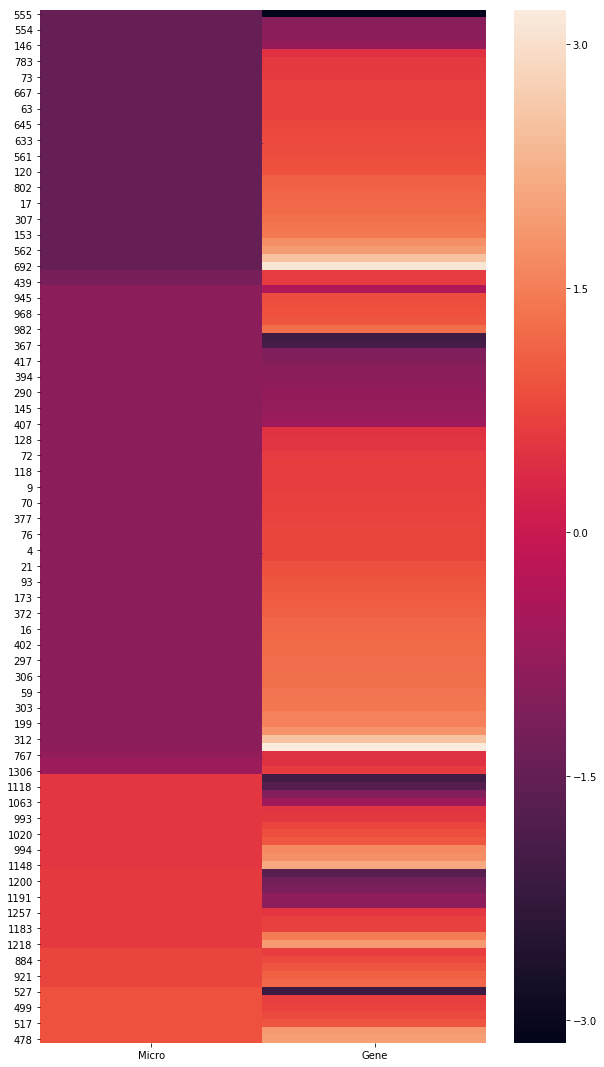

In [185]:
import numpy as np 

%matplotlib inline
fig, ax = plt.subplots(figsize=(10,19))         # Sample figsize in inches

sns.heatmap(df_test,  ax=ax) # annot=True,
